<a href="https://colab.research.google.com/github/raphateixeira/TE-Controle/blob/main/MPC_MMA_Estados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint

Define-se o modelo dinâmico do sistema:

Model Predictive Control

In [2]:
# Modelo dinâmico:
def MMA(x1, x2, u, m, b, k):
    dx1 = x2
    dx2 = -(k/m)*x1 -(b/m)*x2 + (1/m)*u
    return [dx1, dx2]

In [3]:
        #(    uh, rh, x1h, x2h, Ts, Q1, Q2, R, m, b, k)
def Custo(uh, u0, rh, x1h, x2h, Ts, Q1, Q2, R, m, b, k):

    J = 0         # Custo inicial;
    P = len(uh)   # Horizonte;
    #M = 10
    #uh[M:] = uh[M]
    # Simula P passos do sistema:
    for n in range(P):
      # Simula sistema dinâmico:
      dxh = MMA(x1h, x2h, uh[n], m, b, k)
      x1h = x1h + Ts*dxh[0]
      x2h = x2h + Ts*dxh[1]

      # Calcula Custo:
      J += Q1*(rh - x1h)**2 + Q1*x2h**2 + R*(uh[n]-u0[n])**2

    return J

In [4]:
  # MPC(r[n], x1[n], x2[n], u0, Ts, Q1, Q2, R, m, b, k, u_max, du_max)
def MPC(rh, x1h, x2h, uh, Ts, Q1, Q2, R, m,b, k, u_max, du_max):

    du_matrix = np.eye(P) - np.eye(P, k=1)
    restricao1 = LinearConstraint(du_matrix, -du_max, du_max)

    # Restrição sob a primeira ação de controle:
    uM1 = np.zeros([P, P])
    uM1[0, 0] = 1.0
    restricao2 = LinearConstraint(uM1, uh[0]-du_max, uh[0]+du_max)

    # Cria restrições:
    restricoes = [restricao1, restricao2]

    # Cria limites
    limites = [(-u_max, u_max) for n in range(P)]

    # Minimização do MPC
    u_MPC = minimize(Custo, uh,
                     args = (uh, rh, x1h, x2h, Ts, Q1, Q2, R, m, b, k),
                     bounds = limites,
                     constraints = restricoes).x

    return u_MPC

In [5]:
m, b, k = 1.0, 0.9, 0.8 # Parâmetros do sistema
Ts = 0.2 # Período de amostragem;

t_max = 20 # Tempo de simulação;
N = round(t_max/Ts) # Passos da simulação;
t = np.arange(0,Ts*(N),Ts)


# Variáveis do sistema:
x1 = np.zeros(N + 1)
x2 = np.zeros(N + 1)
u = np.zeros(N)
r = np.ones(N)
r[t>5] = 2.0
r[t>10] = -1.5
r[t>15] = 0
# Condições iniciais:
x1[0] = 0.0
x2[0] = 0.0


# Horizontes:
P = 10

# Peso dos custos
Q1 = 1# Peso do estado 0;
Q2 = 0.2 # Peso do estado 1;
R = 2.5 # Peso da ação de  controle;

u_max = 4 # Saturação do sinal de controle;
du_max = 2.5 # Saturação da variação do sinal de controle;


u0 = np.ones(P) # Inicializa sinal de controla para o MPC;


$$J = (r - y)^2 + u^2$$

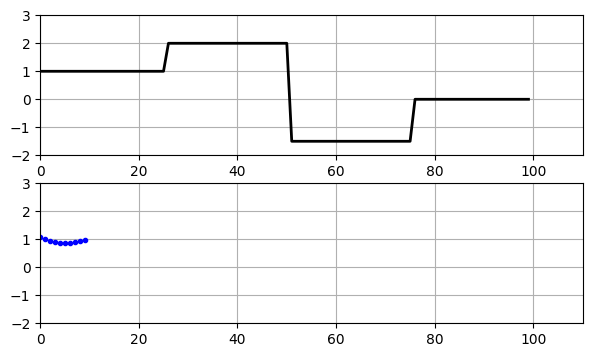

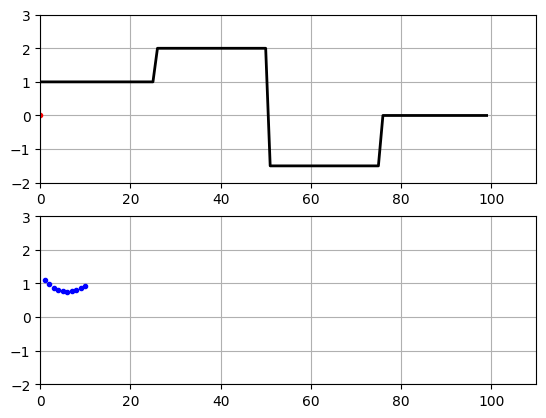

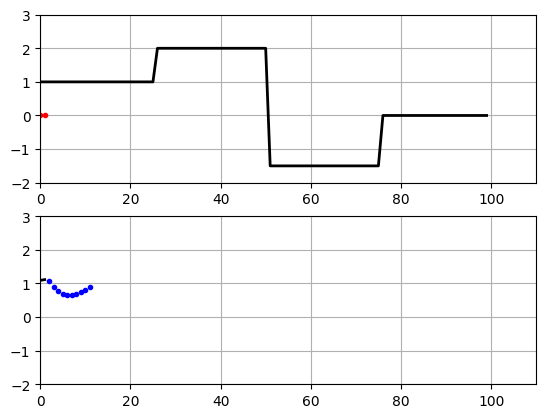

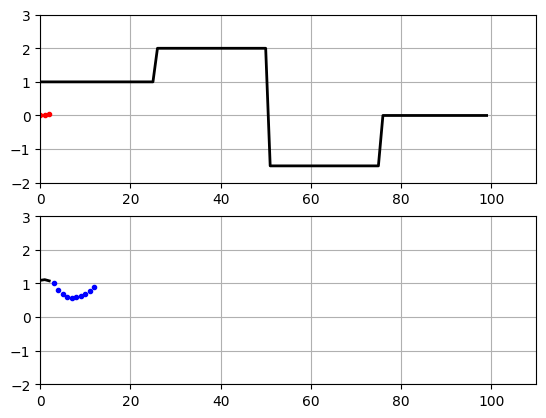

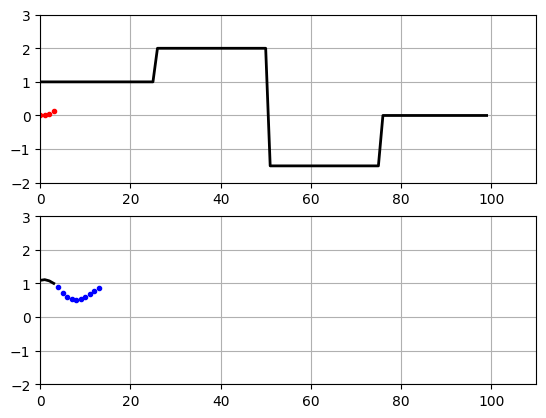

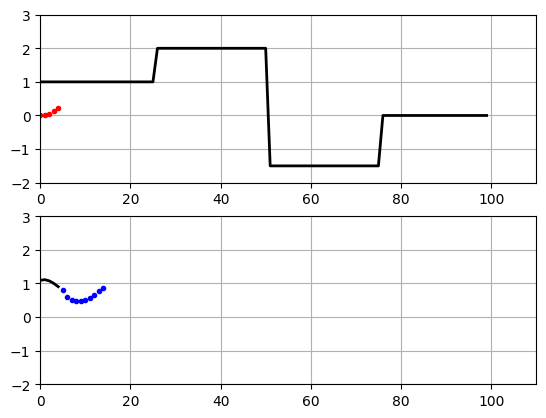

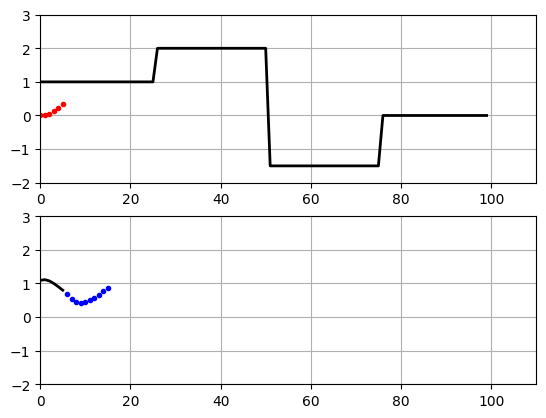

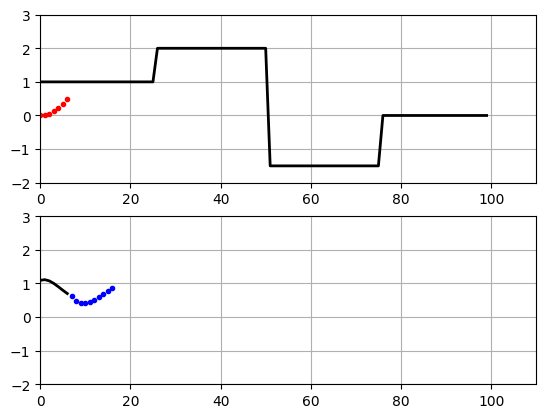

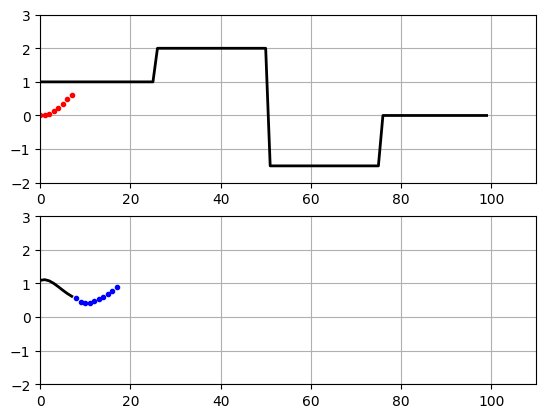

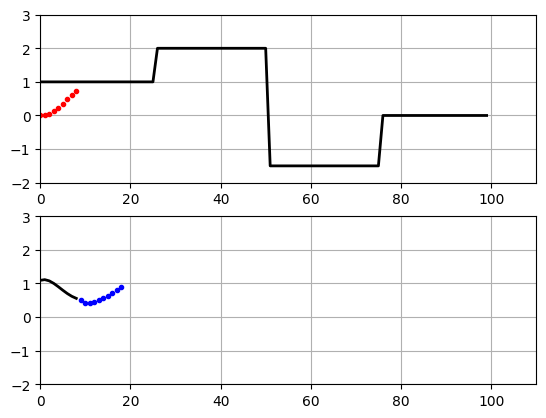

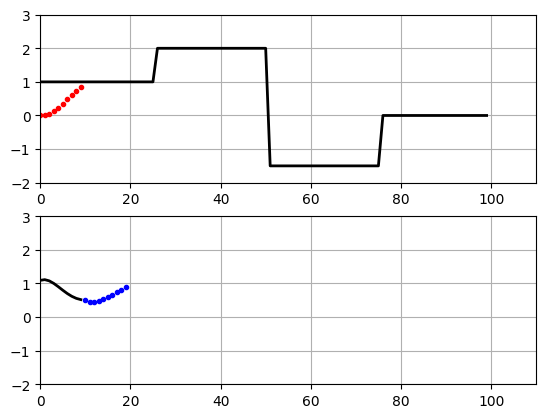

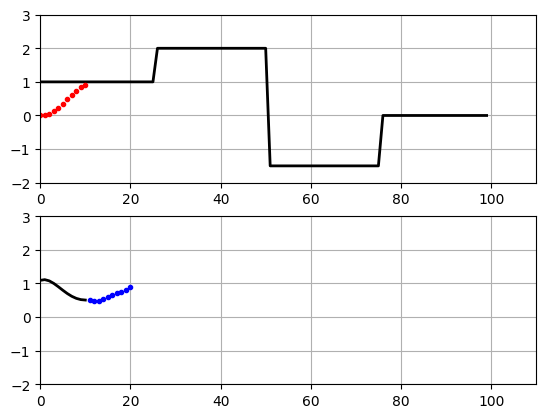

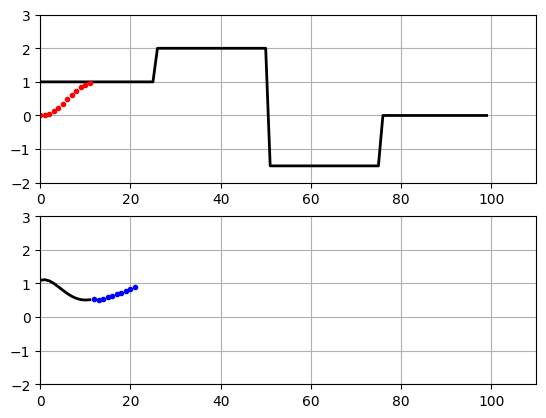

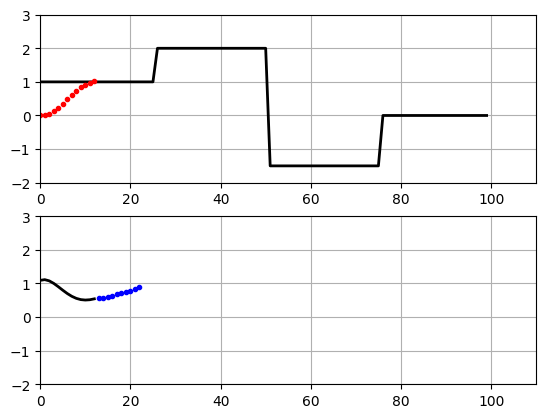

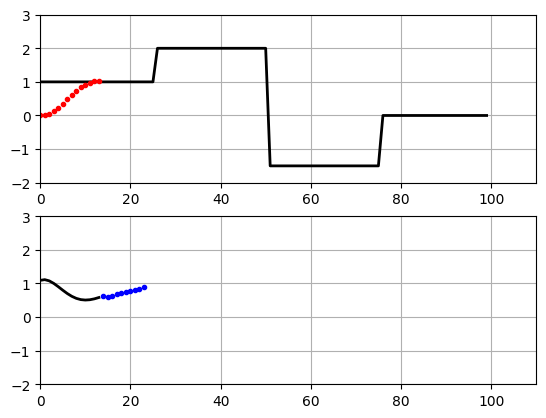

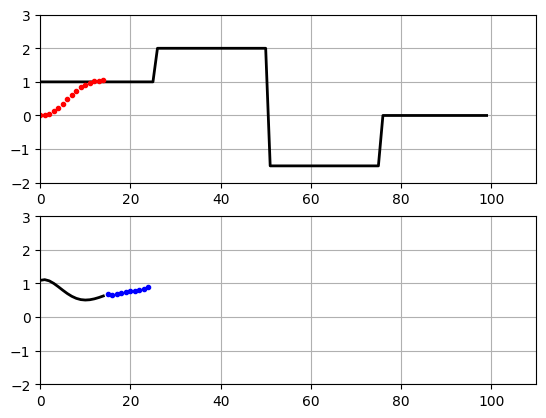

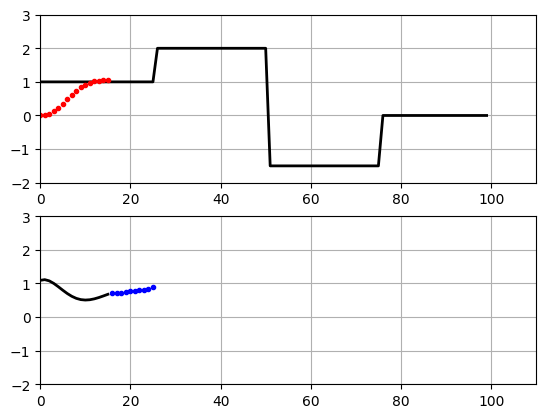

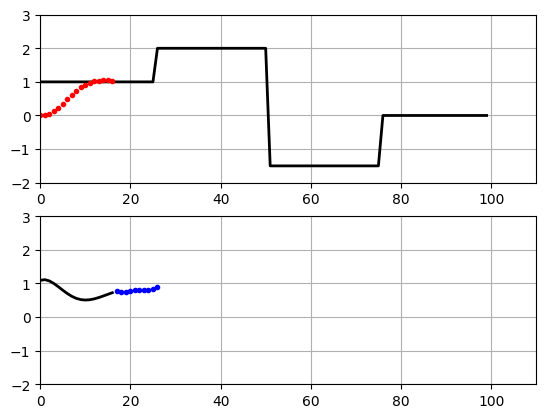

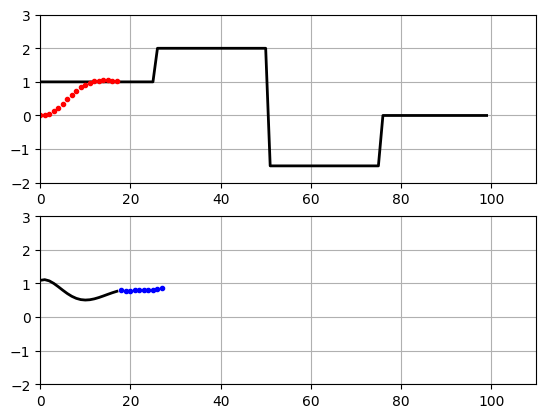

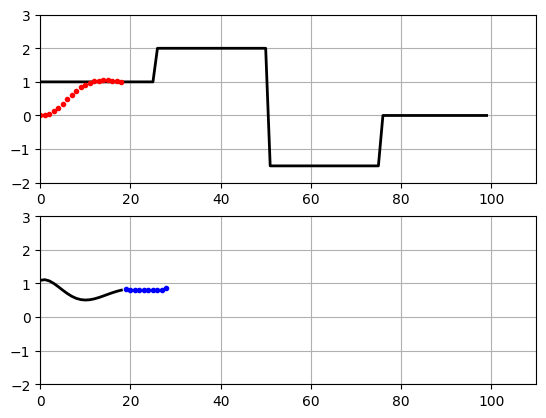

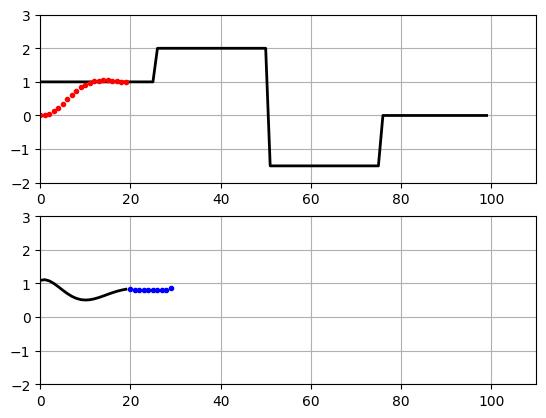

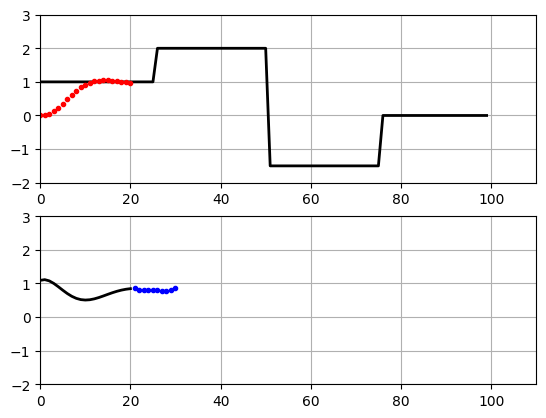

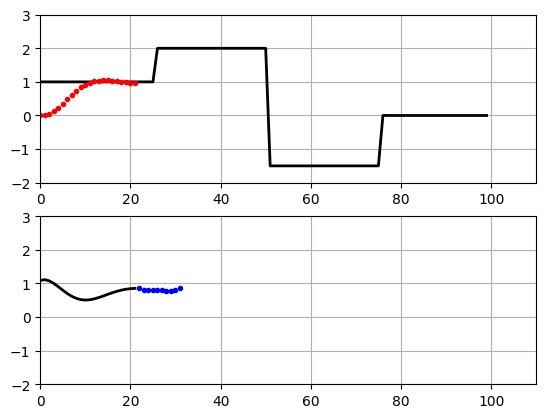

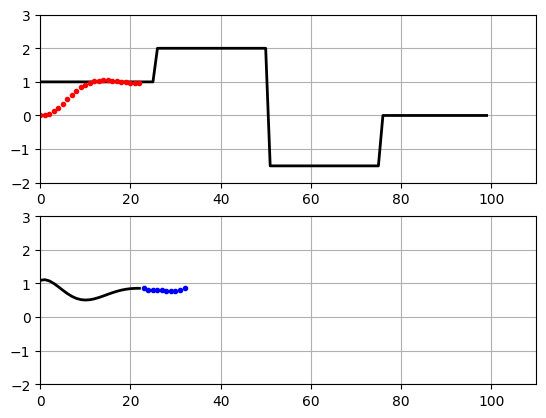

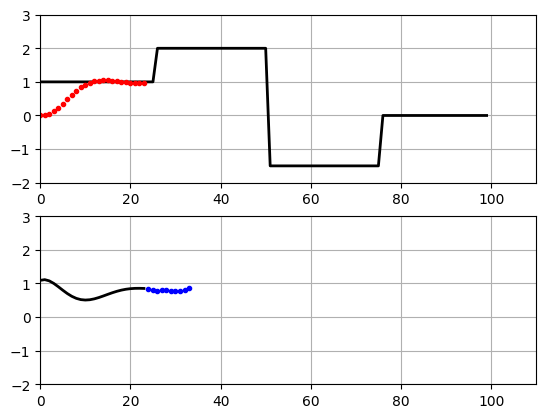

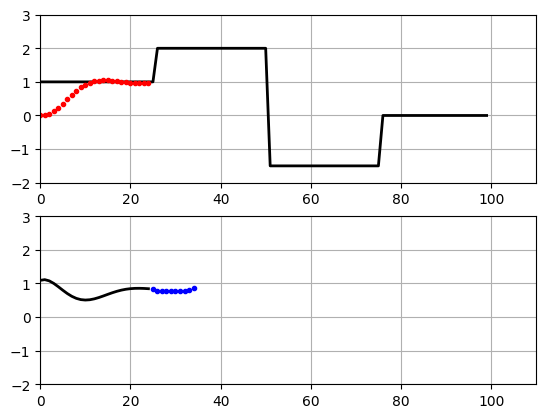

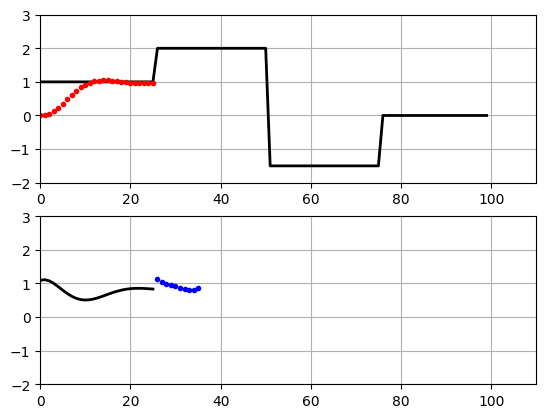

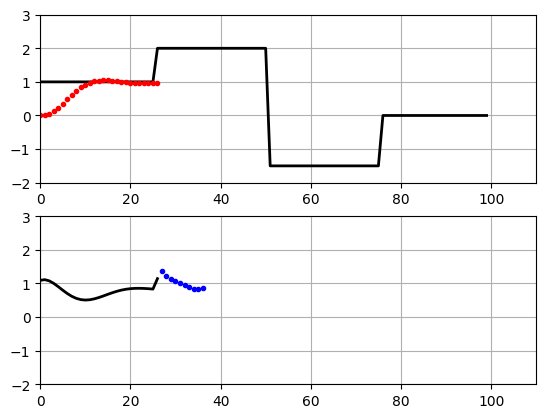

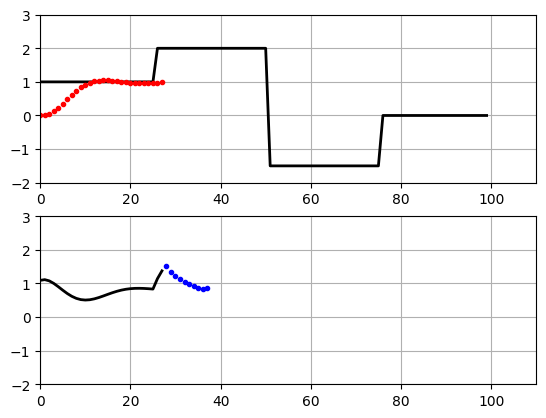

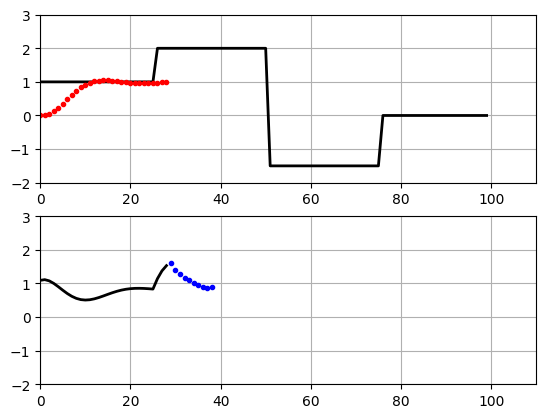

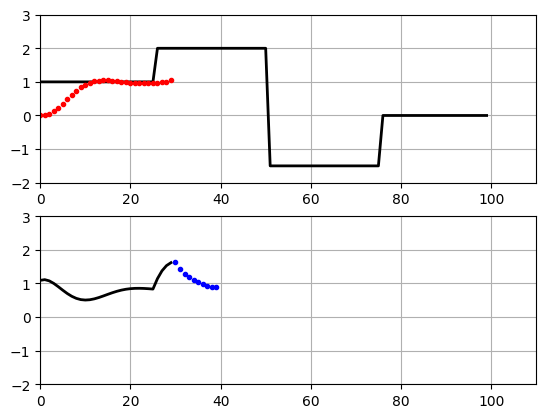

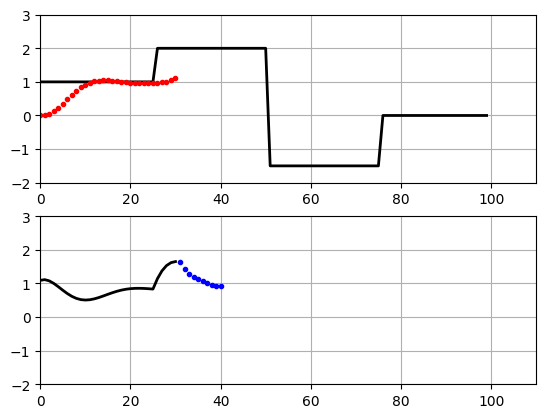

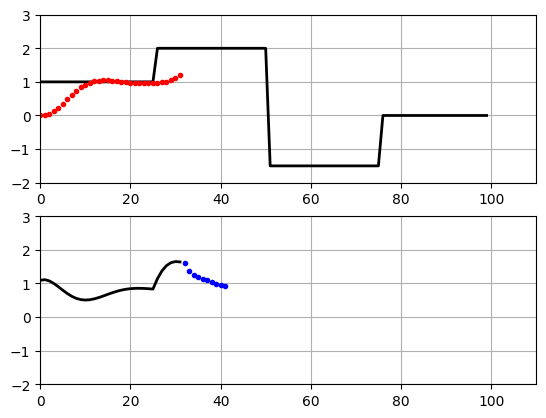

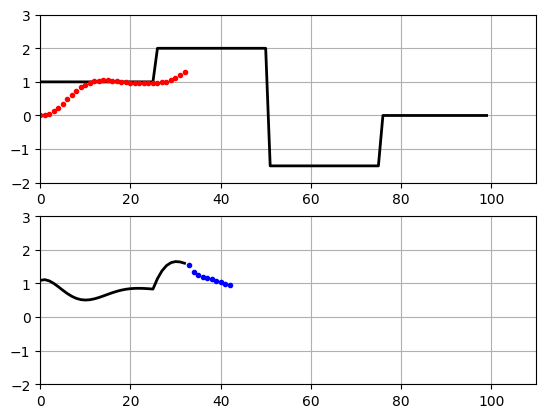

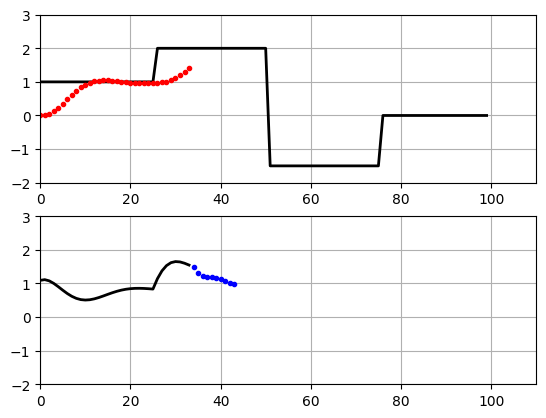

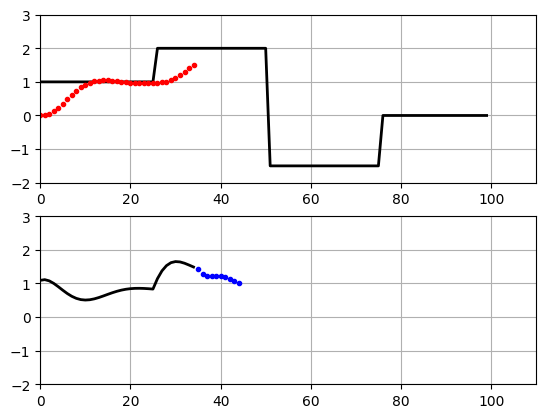

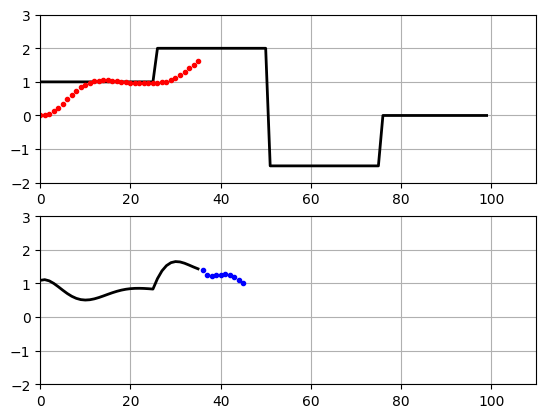

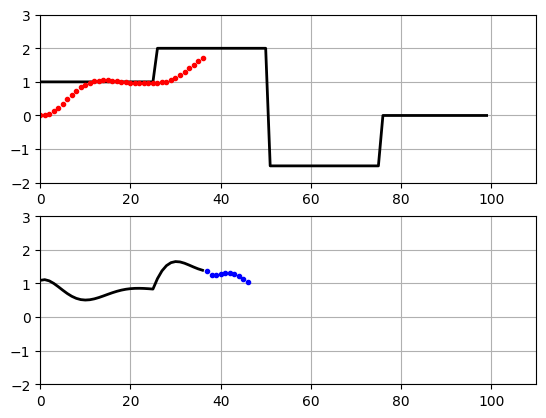

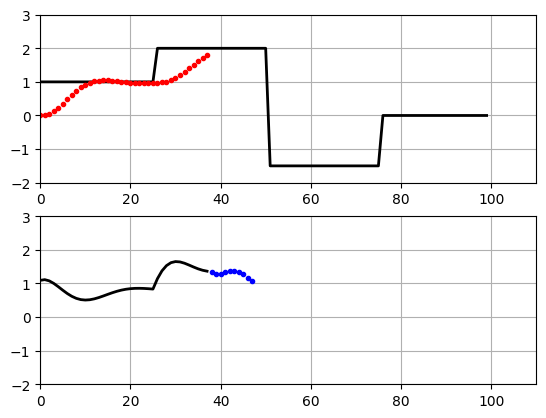

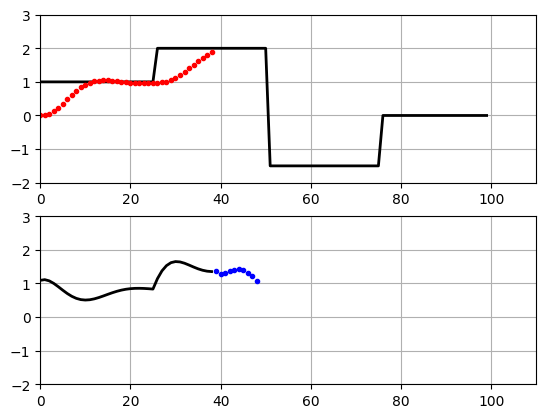

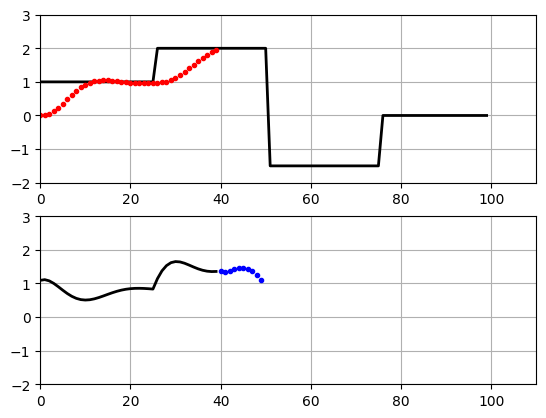

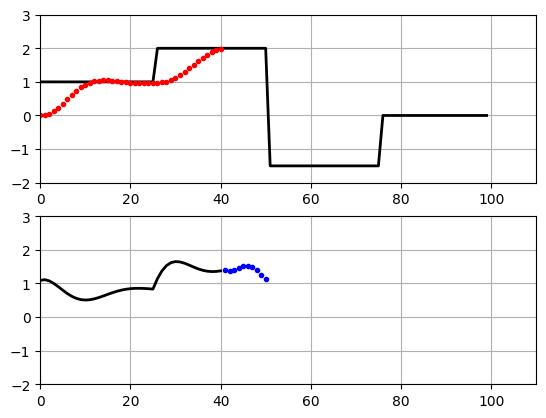

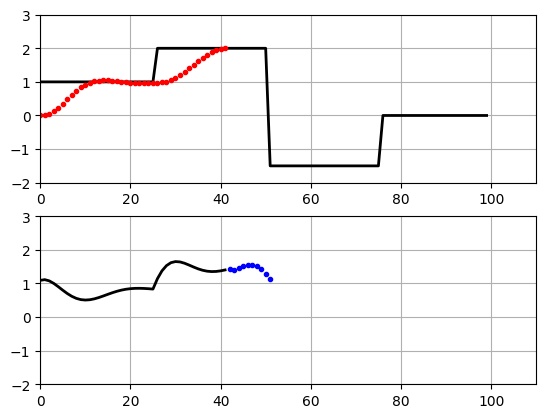

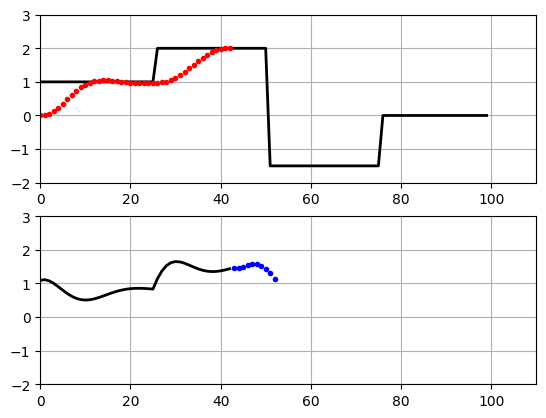

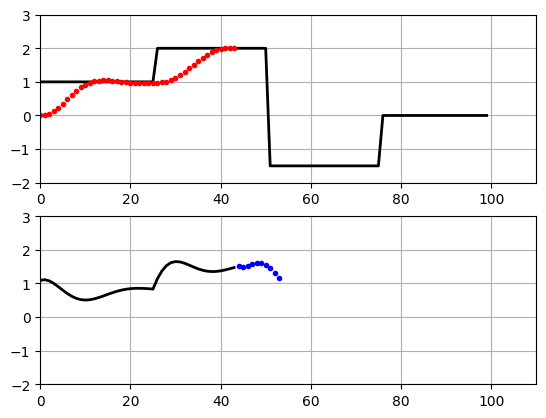

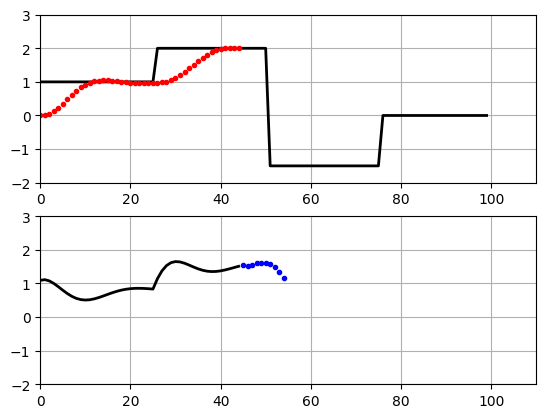

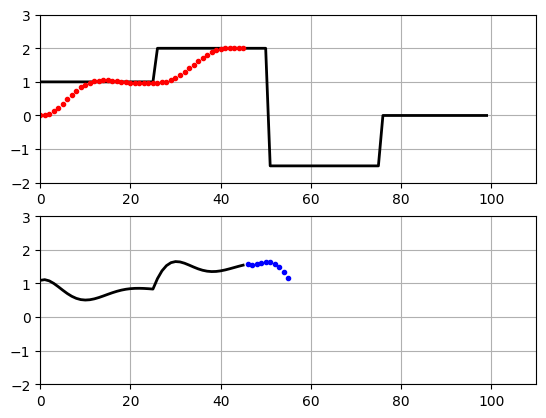

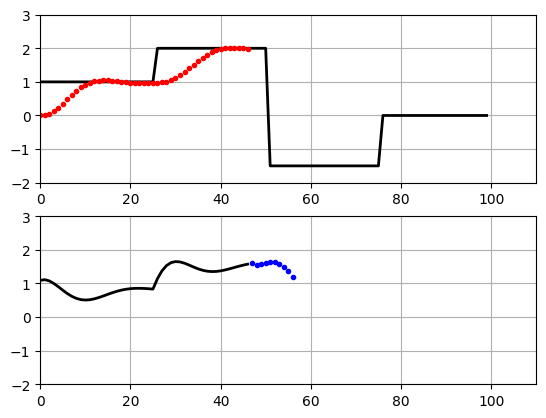

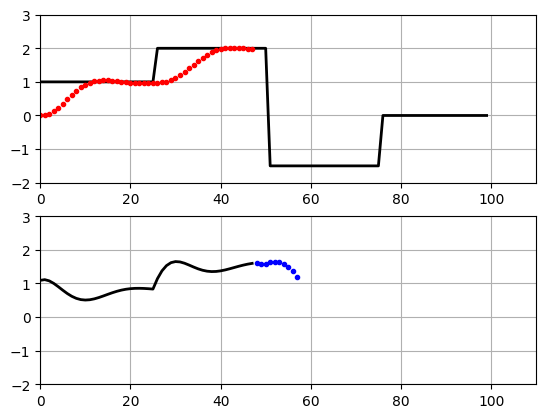

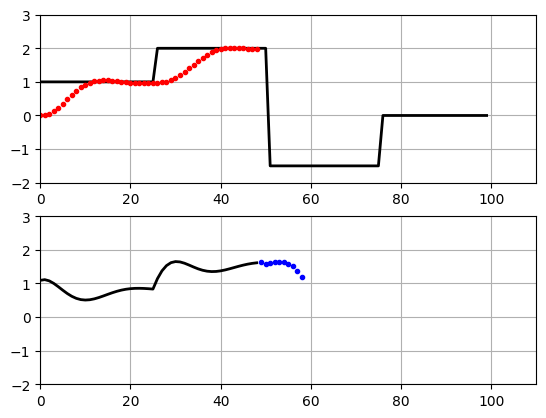

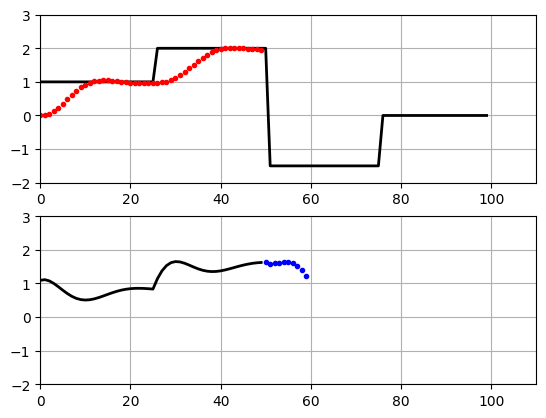

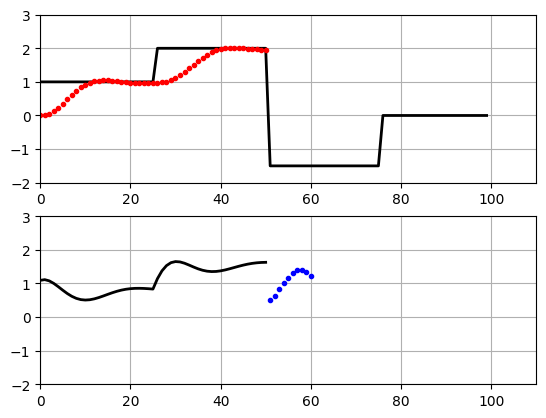

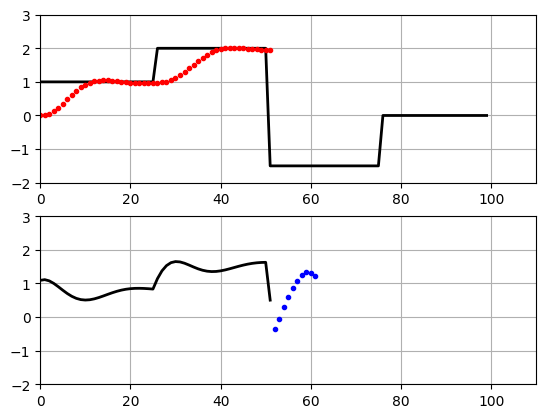

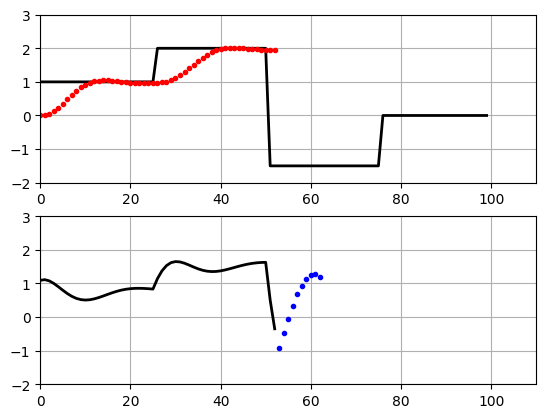

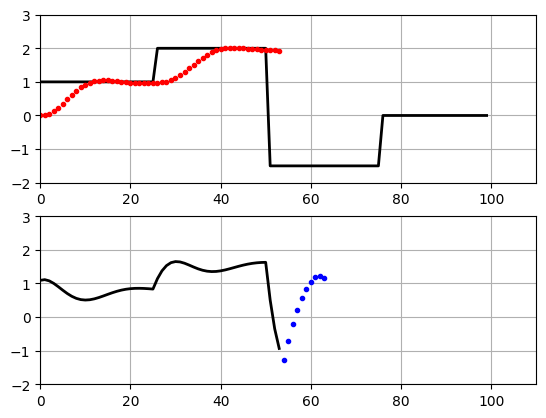

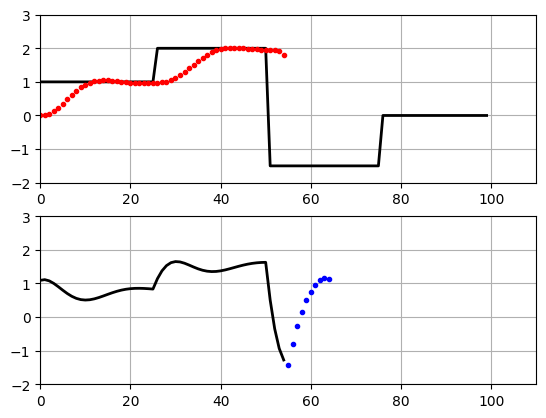

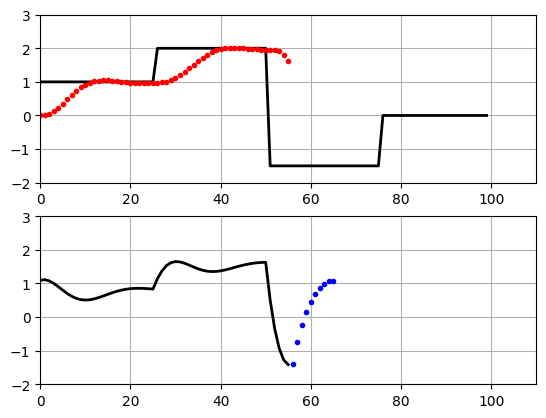

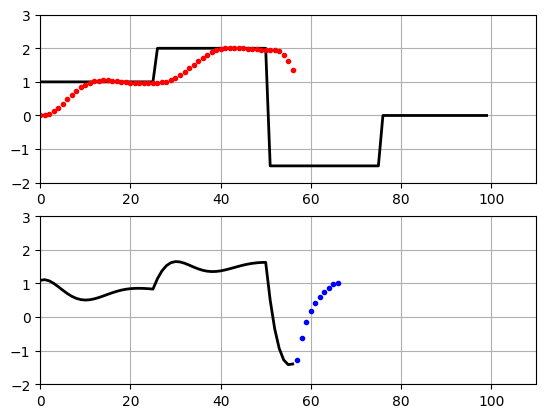

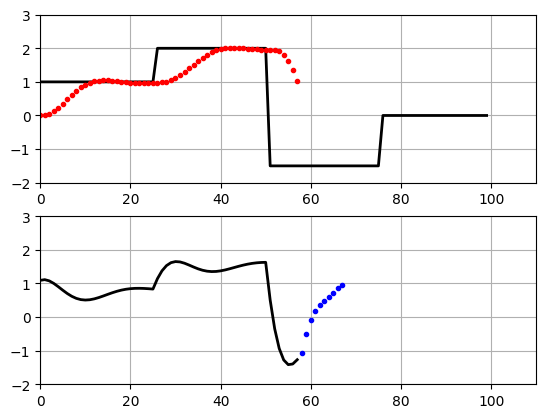

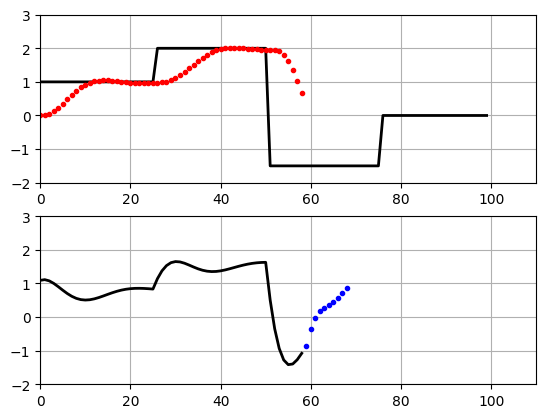

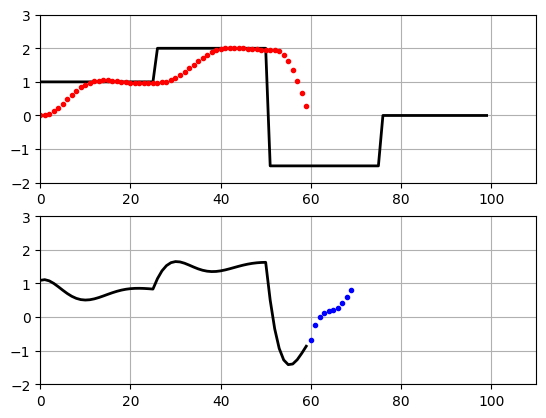

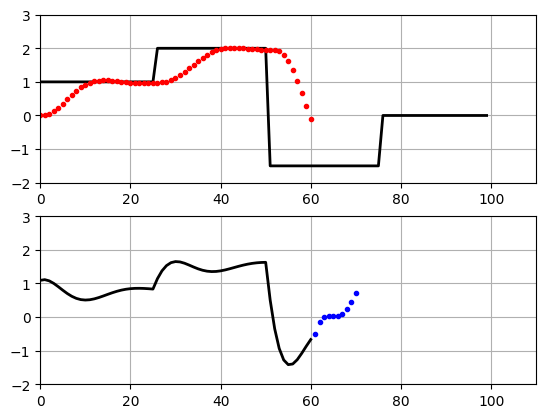

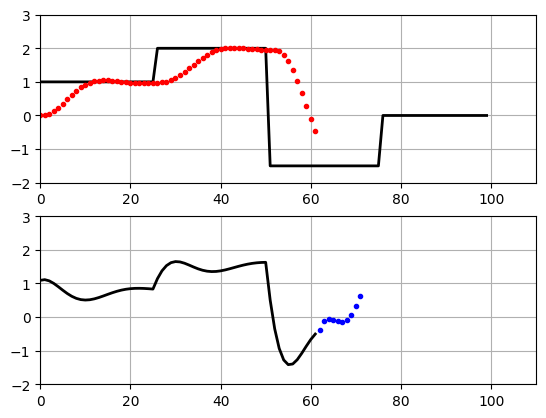

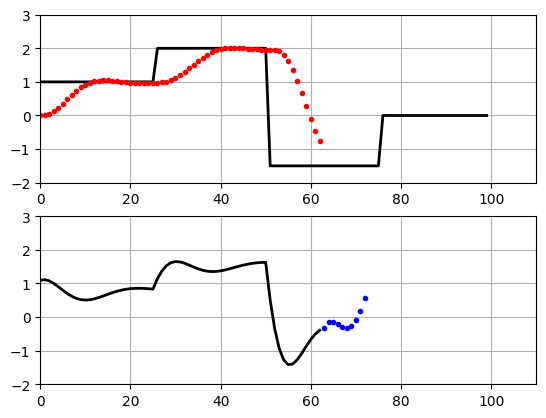

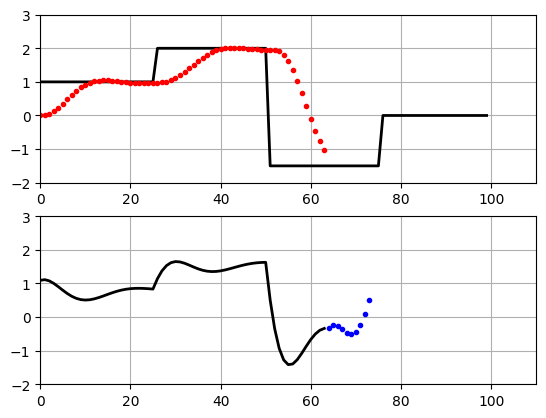

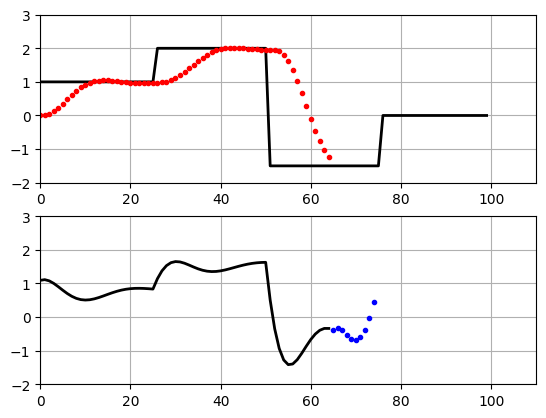

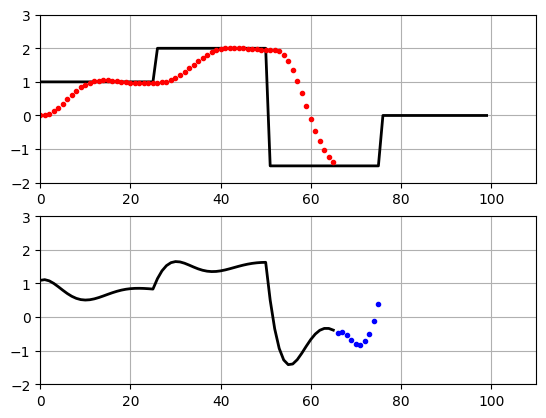

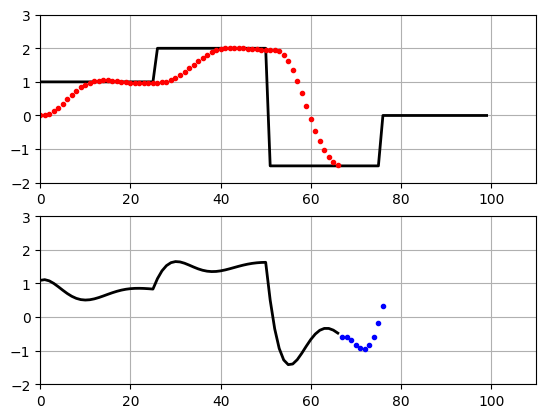

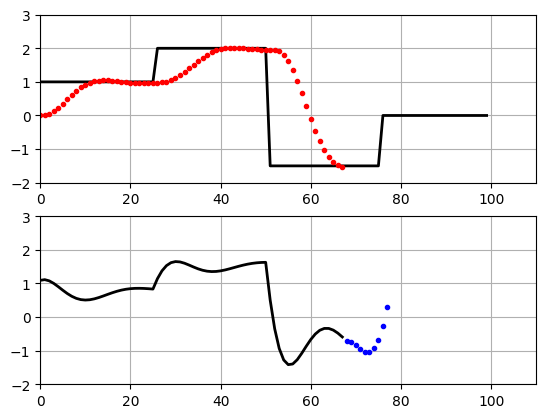

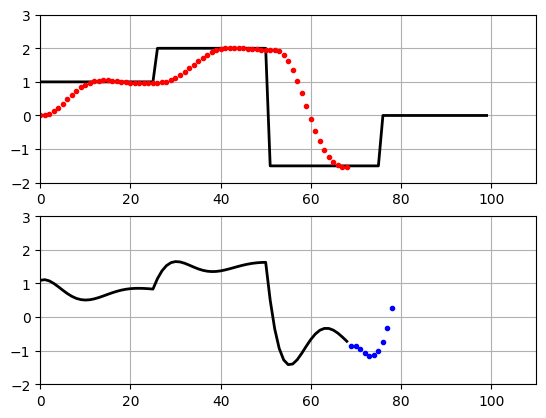

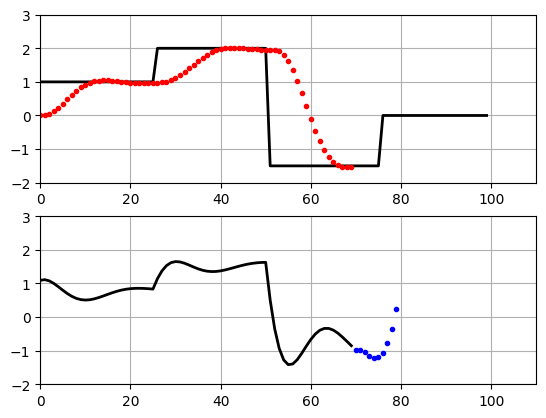

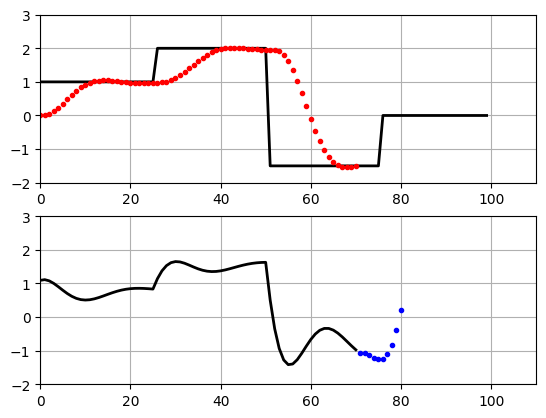

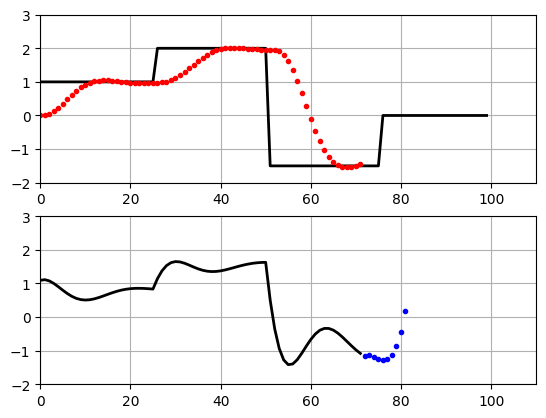

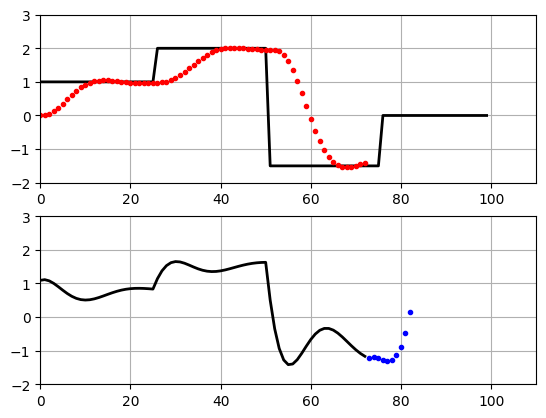

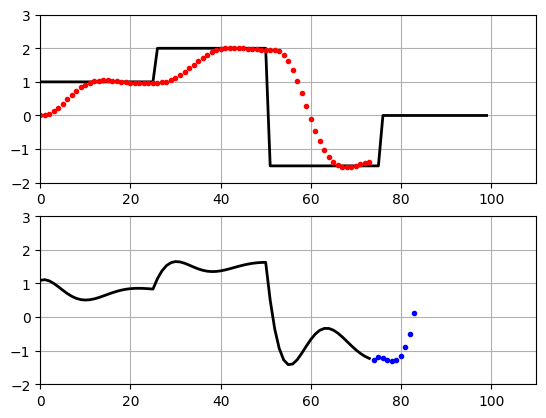

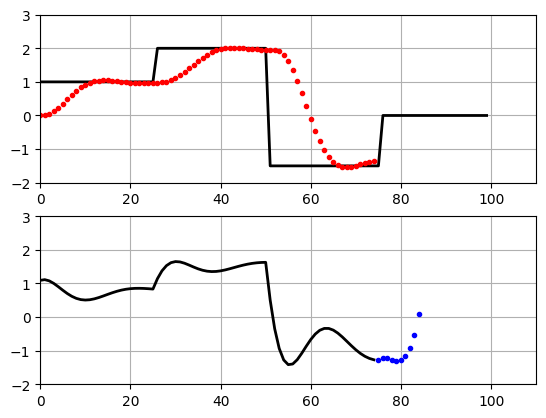

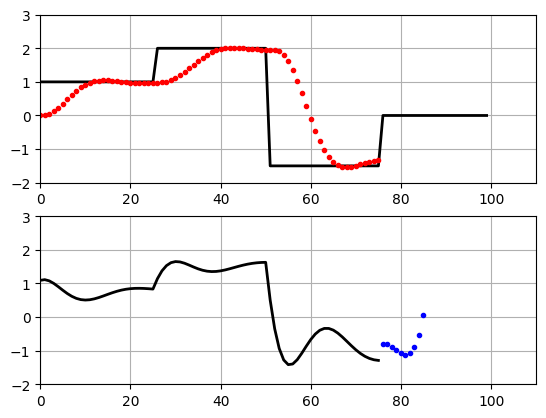

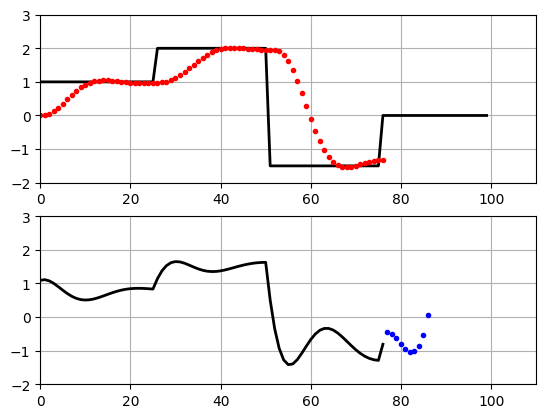

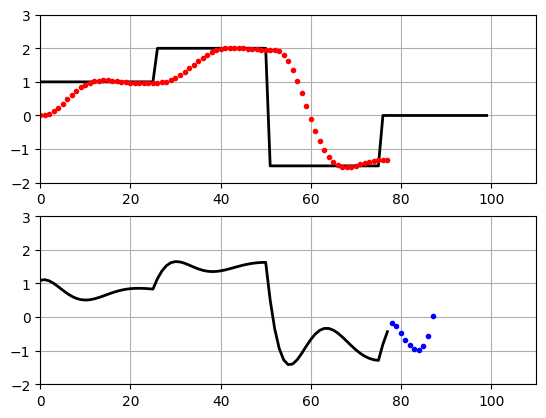

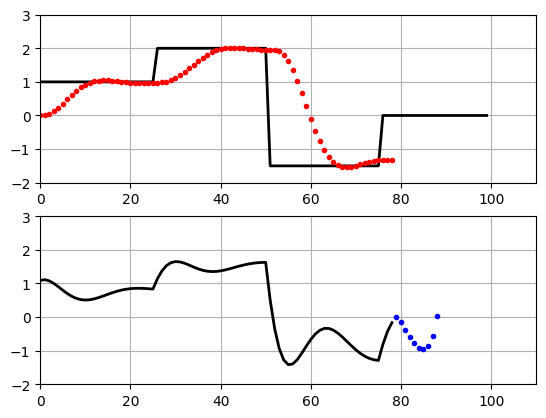

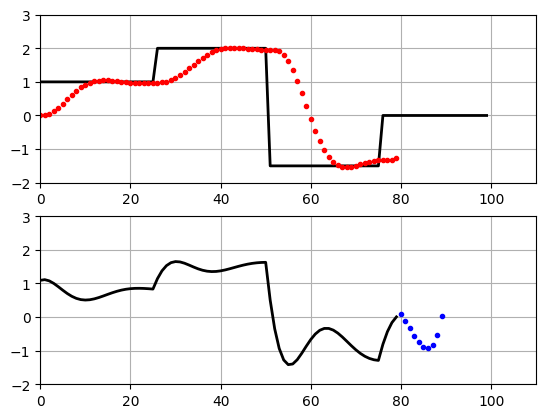

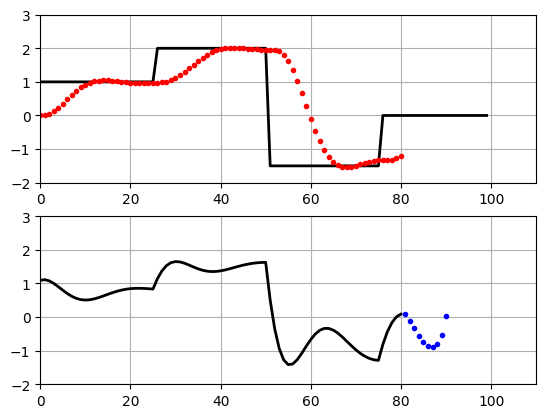

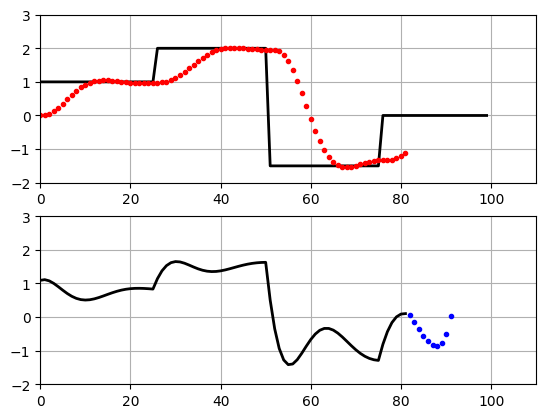

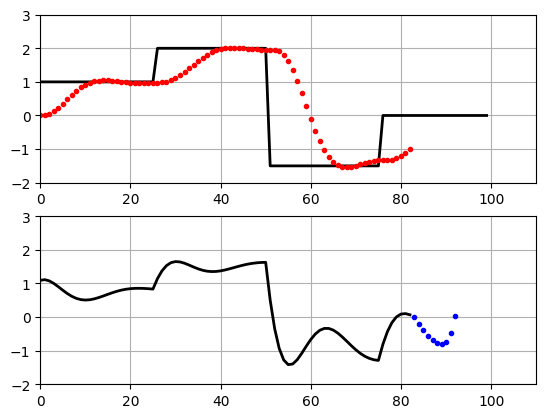

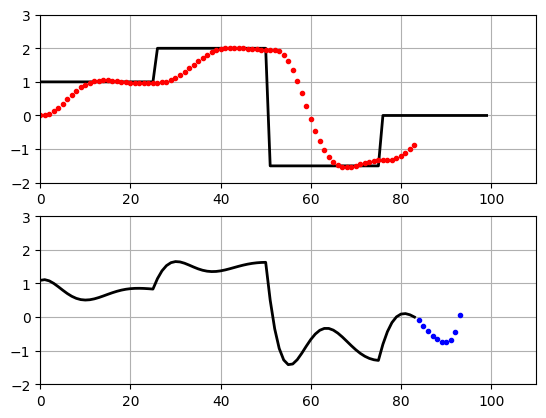

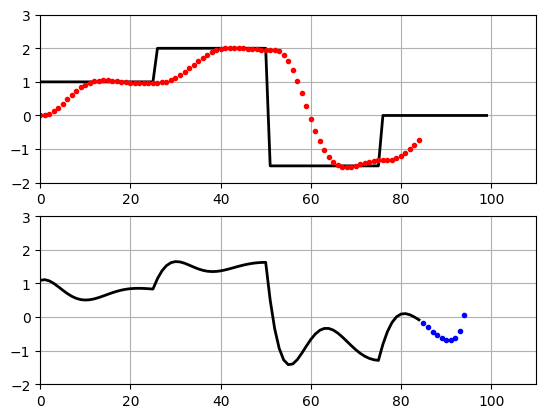

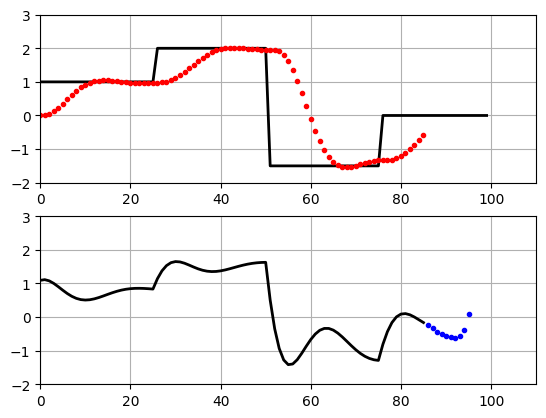

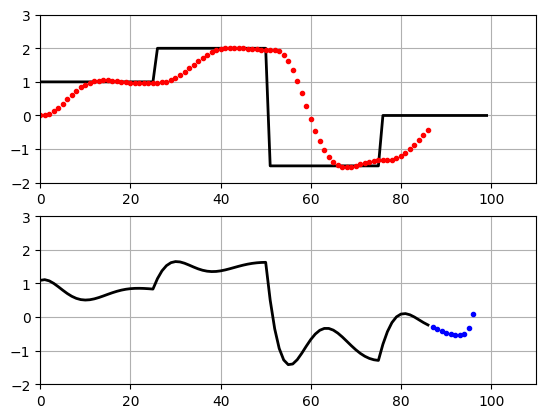

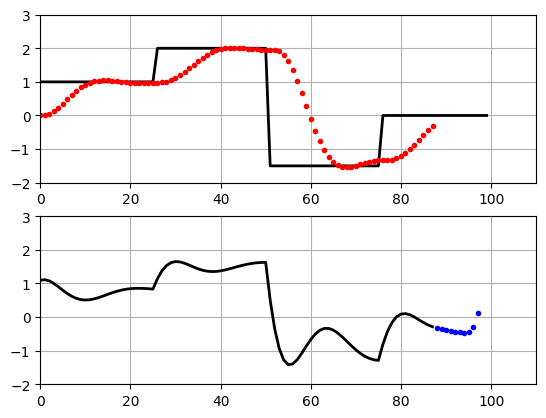

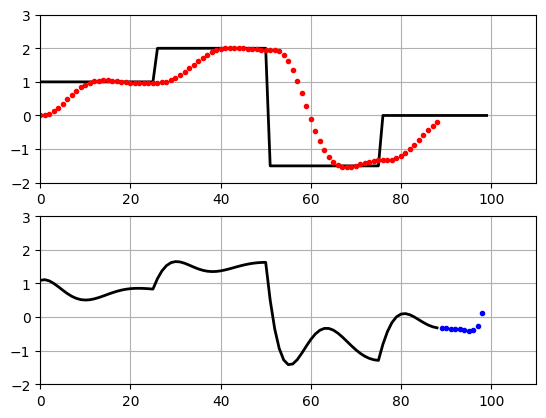

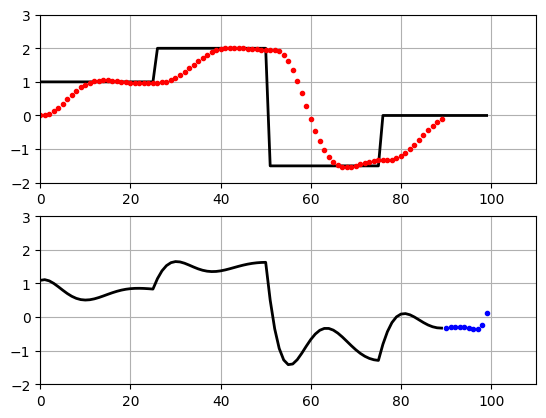

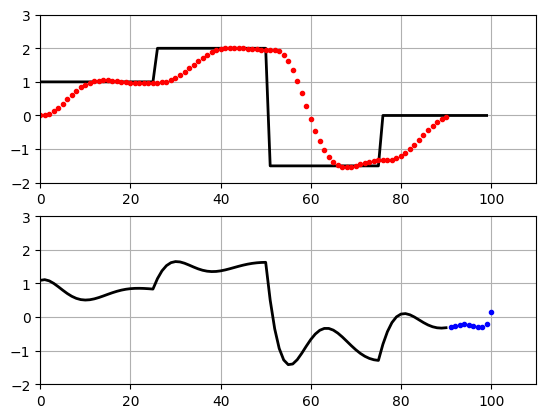

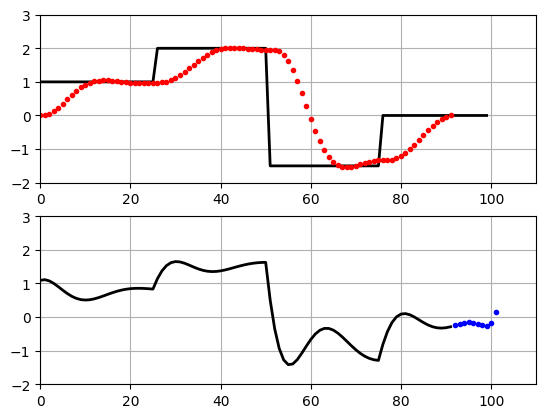

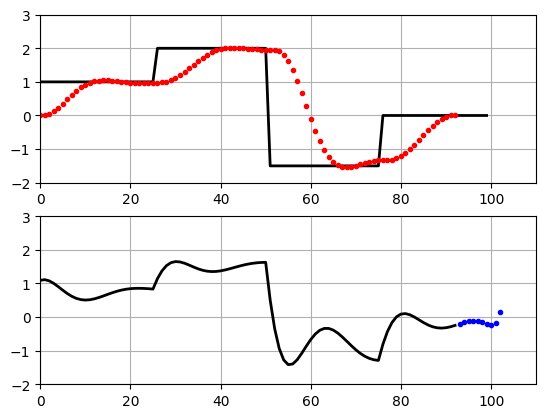

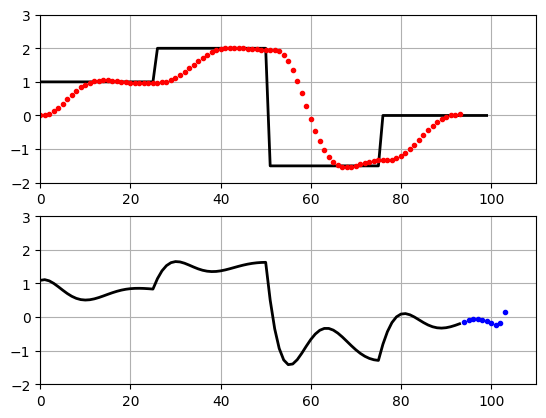

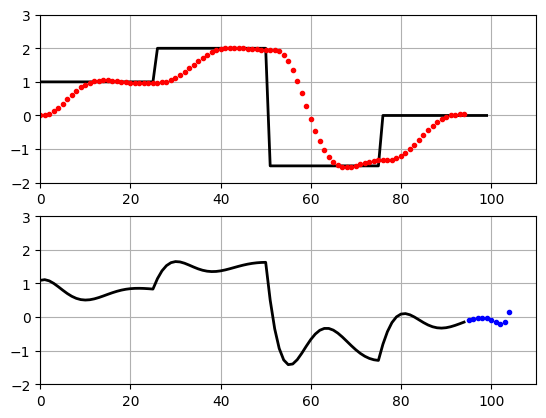

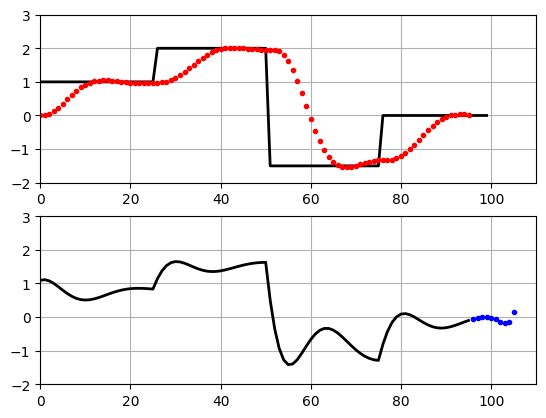

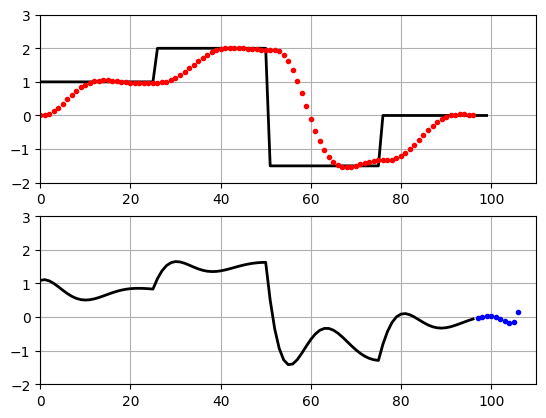

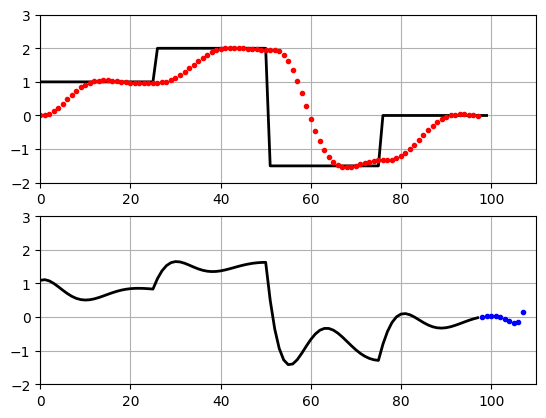

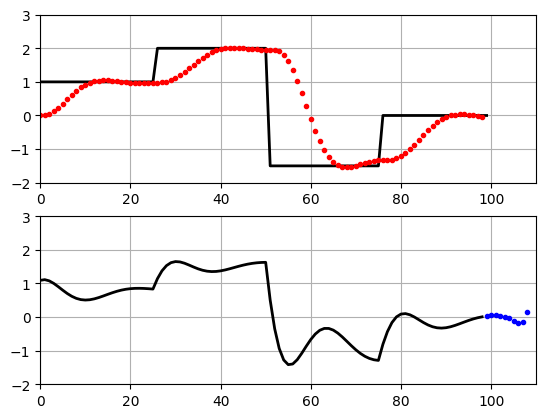

In [6]:
#  Cria gráfico para animação:
plt.figure(figsize=(7,4))
plt.ion()
for n in range(N):
    # Controle MPC:
    u_mpc = MPC(r[n], x1[n], x2[n], u0, Ts, Q1, Q2, R, m, b, k, u_max, du_max)

    # Usa primeira amostra do controle como solução ótima;
    u[n] = u_mpc[0]

    # Inicialização do próximo estágio:
    u0 = u_mpc

    # Simula sistema dinâmico:
    dx = MMA(x1[n], x2[n], u[n], m, b, k)
    x1[n+1] = x1[n] + Ts*dx[0]
    x2[n+1] = x2[n] + Ts*dx[1]

    plt.clf()
    plt.subplot(2,1,1)
    plt.subplot(211)
    plt.plot(r, 'k-',linewidth=2,label='Referência')
    plt.plot(x1[0:n],'.r', linewidth=2,label='Saída')
    plt.xlim(0,N+P)
    plt.ylim(-2,3)
    plt.grid()
    plt.subplot(212)
    plt.plot(u[0:n], 'k-', linewidth=2,label='Controle')
    plt.plot(n+np.arange(0,P),u_mpc, 'b.', linewidth=2,label='Controle')
    plt.xlim(0,N+P)
    plt.ylim(-2,3)
    plt.grid()
    plt.show()


u = MPC(Min(Custo(u, MMA)))